# Import Image

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from Noise3 import generate_fractal_noise_2D

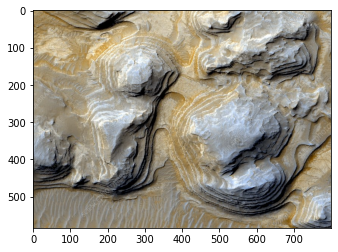

In [2]:
img = cv2.imread('images/mars.jpg')
plt.imshow(img)

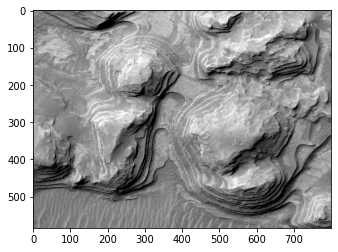

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [4]:
resized = cv2.resize(gray, (100,100))
print(resized)

[[139 142 139 ... 118 130 152]
 [140 132 123 ... 124 149 170]
 [133 123 118 ... 172 183 128]
 ...
 [108 126 110 ...  61  85  82]
 [107 138 113 ... 106 101 107]
 [112 141 110 ...  74  27   4]]


# Mesh generation

In [11]:
from solid import *
from viewscad import Renderer

renderer = Renderer(openscad_exec ='C:\Program Files\OpenSCAD\openscad.exe')
meshgenfile = import_scad('./genmesh.scad')

In [12]:
#P1 = generate_mesh_cp(noise_hm + 10)
normalized = scaleup(resized,10,50)
P2 = meshgenfile.surfaceData(normalized, center=True)
renderer.render(P2)

In [191]:
normalized_inv = scaleup(resized_inv,10,40)
P3 = meshgenfile.surfaceData(normalized_inv, center=True)
renderer.render(P3)

# Generate Noise

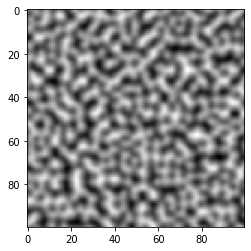

In [5]:
size = 100
noise_hm = generate_fractal_noise_2D((size,size),(10,10),2, 10)
plt.imshow(noise_hm, cmap='gray')

In [6]:
noise_hm

array([[ 0.        , -0.03098628,  0.86662734, ...,  3.75164322,
         3.92571895,  2.15286793],
       [-2.45147292, -2.13125215, -0.24379298, ...,  4.3836516 ,
         2.68481956, -0.27130028],
       [-2.95649001, -2.12695031, -0.58559032, ...,  3.00757846,
        -0.10085259, -3.40308893],
       ...,
       [ 5.12796611,  5.61172081,  5.24789503, ..., -4.58819213,
        -6.10411328, -6.22869247],
       [ 4.84861826,  3.90793719,  2.65386539, ..., -0.73936552,
        -2.50055533, -4.54258034],
       [ 2.34891326,  0.64536432, -0.10996291, ...,  3.28735037,
         2.08130929, -0.80257854]])

In [7]:
def scaleup(a, minn, maxx):
    return np.interp(a,(a.min(), a.max()), (minn, maxx))

scaled_noise = scaleup(noise_hm, 10, 40)

In [171]:
P2 = meshgenfile.surfaceData(scaled_noise, center=True)
renderer.render(P2)

# Frequency Analysis

In [8]:
import matlab.engine
eng = matlab.engine.start_matlab()

In [13]:
normalized

array([[32.06349206, 32.53968254, 32.06349206, ..., 28.73015873,
        30.63492063, 34.12698413],
       [32.22222222, 30.95238095, 29.52380952, ..., 29.68253968,
        33.65079365, 36.98412698],
       [31.11111111, 29.52380952, 28.73015873, ..., 37.3015873 ,
        39.04761905, 30.31746032],
       ...,
       [27.14285714, 30.        , 27.46031746, ..., 19.68253968,
        23.49206349, 23.01587302],
       [26.98412698, 31.9047619 , 27.93650794, ..., 26.82539683,
        26.03174603, 26.98412698],
       [27.77777778, 32.38095238, 27.46031746, ..., 21.74603175,
        14.28571429, 10.63492063]])

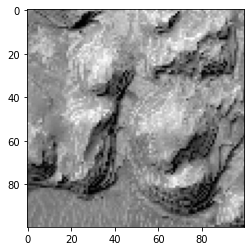

In [14]:
plt.imshow(normalized, cmap='gray')

In [15]:
Y1 = (eng.fft2(matlab.double(normalized.tolist())))
eng.imagesc(eng.abs(eng.fftshift(Y1)))

In [17]:
eng.imagesc(eng.angle(eng.fftshift(Y1)))

In [19]:
Y2 = (eng.fft2(matlab.double(noise_hm.tolist())))
eng.imagesc(eng.abs(eng.fftshift(Y2)))

In [20]:
eng.imagesc(eng.angle(eng.fftshift(Y2)))